In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from sklearn.metrics import pairwise_distances
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
import re


In [3]:
# read csv file
df = pd.read_csv("../Ken Folder/df_geo_imp.csv", index_col=0)
# rename column names
df.columns = ["PC", "BT", "Quarter", "EUR/m2", "latitude", "longitude"]
df


,PC,BT,Quarter,EUR/m2,latitude,longitude
0,100,one-room,2010-01-01,5458,60.1714,24.9316
1,100,two-room,2010-01-01,5164,60.1714,24.9316
2,100,three or more room,2010-01-01,4944,60.1714,24.9316
3,100,terrace house,2010-01-01,1783,60.1714,24.9316
4,100,one-room,2010-04-01,5347,60.1714,24.9316
...,...,...,...,...,...,...
308931,99980,terrace house,2021-01-01,2219,69.8467,26.8907
308932,99980,one-room,2021-04-01,2290,69.8467,26.8907
308933,99980,two-room,2021-04-01,2290,69.8467,26.8907
308934,99980,three or more room,2021-04-01,2290,69.8467,26.8907


In [19]:
# get three room buildings
three_room = df[ df["BT"] == "three or more room" ]
three_room

# pick time series chains 
ts_df = pd.DataFrame()
grouping = three_room.groupby('PC')
for i in df.PC.unique() :
    ts_df[str(i)] = grouping.get_group(i)["EUR/m2"].values
ts_df = ts_df.T
ts_df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
100,4944,5396,4828,5394,5571,5709,5450,5010,5704,5466,...,6883,6846,7379,6728,7205,6678,7178,7405,8053,8174
120,6236,5713,5884,5666,5691,5571,5512,5317,5858,5800,...,7740,7443,7253,7887,7607,8060,8258,8146,8559,8389
130,5145,5304,5340,5397,5496,5621,5652,5625,5724,5676,...,6020,6133,6035,5947,6229,6312,6331,6413,6510,6653
140,6297,6444,6420,5972,6734,6673,6544,6807,7089,6170,...,8485,8508,8050,8832,8232,9291,8590,9001,9646,9736
150,5972,5894,5633,5833,6275,5911,6221,5521,6013,5608,...,8271,8410,7674,7644,8860,8732,7677,8375,10117,9355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99830,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2084,2117,2101,2069,2135,2152,2173,2172,2219,2290
99870,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2084,2117,2101,2069,2135,2152,2173,2172,2219,2290
99930,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2084,2117,2101,2069,2135,2152,2173,2172,2219,2290
99950,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2084,2117,2101,2069,2135,2152,2173,2172,2219,2290


In [26]:
# metrics.dtw(ts_df['100'], ts_df['200'])
# 2 min 36s
distance = pairwise_distances(ts_df, metric = dtw, n_jobs=-1)
distance

array([[    0.        ,  2372.05185441,  2688.57006604, ...,
        28106.97966698, 28106.97966698, 28106.97966698],
       [ 2372.05185441,     0.        ,  5025.71099448, ...,
        31747.87707863, 31747.87707863, 31747.87707863],
       [ 2688.57006604,  5025.71099448,     0.        , ...,
        26488.09817635, 26488.09817635, 26488.09817635],
       ...,
       [28106.97966698, 31747.87707863, 26488.09817635, ...,
            0.        ,     0.        ,     0.        ],
       [28106.97966698, 31747.87707863, 26488.09817635, ...,
            0.        ,     0.        ,     0.        ],
       [28106.97966698, 31747.87707863, 26488.09817635, ...,
            0.        ,     0.        ,     0.        ]])

In [32]:
d = pd.DataFrame(distance)
d.columns  = ts_df.index
d.index = d.columns
d

,100,120,130,140,150,160,170,180,190,200,...,99620,99660,99690,99710,99800,99830,99870,99930,99950,99980
100,0.000000,2372.051854,2688.570066,4306.168715,3556.351079,3046.201077,1466.028990,1761.276810,28106.979667,3131.479842,...,28106.979667,28106.979667,28106.979667,28106.979667,28106.979667,28106.979667,28106.979667,28106.979667,28106.979667,28106.979667
120,2372.051854,0.000000,5025.710994,2914.635998,2985.336664,3356.611684,2114.154677,3426.608673,31747.877079,6602.138593,...,31747.877079,31747.877079,31747.877079,31747.877079,31747.877079,31747.877079,31747.877079,31747.877079,31747.877079,31747.877079
130,2688.570066,5025.710994,0.000000,8307.112435,7071.054943,3269.287843,2501.772372,3406.627658,26488.098176,3288.374370,...,26488.098176,26488.098176,26488.098176,26488.098176,26488.098176,26488.098176,26488.098176,26488.098176,26488.098176,26488.098176
140,4306.168715,2914.635998,8307.112435,0.000000,2479.814308,5380.621340,4588.430342,5810.100515,36638.509317,10814.443999,...,36638.509317,36638.509317,36638.509317,36638.509317,36638.509317,36638.509317,36638.509317,36638.509317,36638.509317,36638.509317
150,3556.351079,2985.336664,7071.054943,2479.814308,0.000000,4712.853064,3883.296924,4439.898422,34016.533348,8683.294478,...,34016.533348,34016.533348,34016.533348,34016.533348,34016.533348,34016.533348,34016.533348,34016.533348,34016.533348,34016.533348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99830,28106.979667,31747.877079,26488.098176,36638.509317,34016.533348,28025.374378,28996.050524,27702.934754,0.000000,21268.566995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99870,28106.979667,31747.877079,26488.098176,36638.509317,34016.533348,28025.374378,28996.050524,27702.934754,0.000000,21268.566995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99930,28106.979667,31747.877079,26488.098176,36638.509317,34016.533348,28025.374378,28996.050524,27702.934754,0.000000,21268.566995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99950,28106.979667,31747.877079,26488.098176,36638.509317,34016.533348,28025.374378,28996.050524,27702.934754,0.000000,21268.566995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Time Series KMeans with K=3

In [33]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", n_jobs=-1)
labels = km.fit_predict(ts_df)
labels

/Users/atreya/opt/anaconda3/lib/python3.7/site-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


array([1, 1, 1, ..., 0, 0, 0])

In [34]:
ts_df['label'] = labels
ts_df

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,label
100,4944,5396,4828,5394,5571,5709,5450,5010,5704,5466,...,6846,7379,6728,7205,6678,7178,7405,8053,8174,1
120,6236,5713,5884,5666,5691,5571,5512,5317,5858,5800,...,7443,7253,7887,7607,8060,8258,8146,8559,8389,1
130,5145,5304,5340,5397,5496,5621,5652,5625,5724,5676,...,6133,6035,5947,6229,6312,6331,6413,6510,6653,1
140,6297,6444,6420,5972,6734,6673,6544,6807,7089,6170,...,8508,8050,8832,8232,9291,8590,9001,9646,9736,1
150,5972,5894,5633,5833,6275,5911,6221,5521,6013,5608,...,8410,7674,7644,8860,8732,7677,8375,10117,9355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99830,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2117,2101,2069,2135,2152,2173,2172,2219,2290,0
99870,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2117,2101,2069,2135,2152,2173,2172,2219,2290,0
99930,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2117,2101,2069,2135,2152,2173,2172,2219,2290,0
99950,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2117,2101,2069,2135,2152,2173,2172,2219,2290,0


In [35]:
# adding latitudes and longitudes for plotting
latitudes = list(map(
    lambda x: df[df.PC == x]['latitude'].values[0], ts_df.index.values.astype('int')))
longitudes = list(map(
    lambda x: df[df.PC == x]['longitude'].values[0], ts_df.index.values.astype('int')))
ts_df['latitude'] = latitudes
ts_df['longitude'] = longitudes
ts_df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,label,latitude,longitude
100,4944,5396,4828,5394,5571,5709,5450,5010,5704,5466,...,6728,7205,6678,7178,7405,8053,8174,1,60.1714,24.9316
120,6236,5713,5884,5666,5691,5571,5512,5317,5858,5800,...,7887,7607,8060,8258,8146,8559,8389,1,60.1632,24.9391
130,5145,5304,5340,5397,5496,5621,5652,5625,5724,5676,...,5947,6229,6312,6331,6413,6510,6653,1,60.1645,24.9487
140,6297,6444,6420,5972,6734,6673,6544,6807,7089,6170,...,8832,8232,9291,8590,9001,9646,9736,1,60.1578,24.9525
150,5972,5894,5633,5833,6275,5911,6221,5521,6013,5608,...,7644,8860,8732,7677,8375,10117,9355,1,60.1570,24.9369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99830,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2069,2135,2152,2173,2172,2219,2290,0,68.4230,27.3965
99870,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2069,2135,2152,2173,2172,2219,2290,0,68.9287,26.9896
99930,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2069,2135,2152,2173,2172,2219,2290,0,69.4918,28.5786
99950,1783,1824,1837,1822,1869,1898,1894,1862,1900,1930,...,2069,2135,2152,2173,2172,2219,2290,0,69.4729,25.9527


No handles with labels found to put in legend.


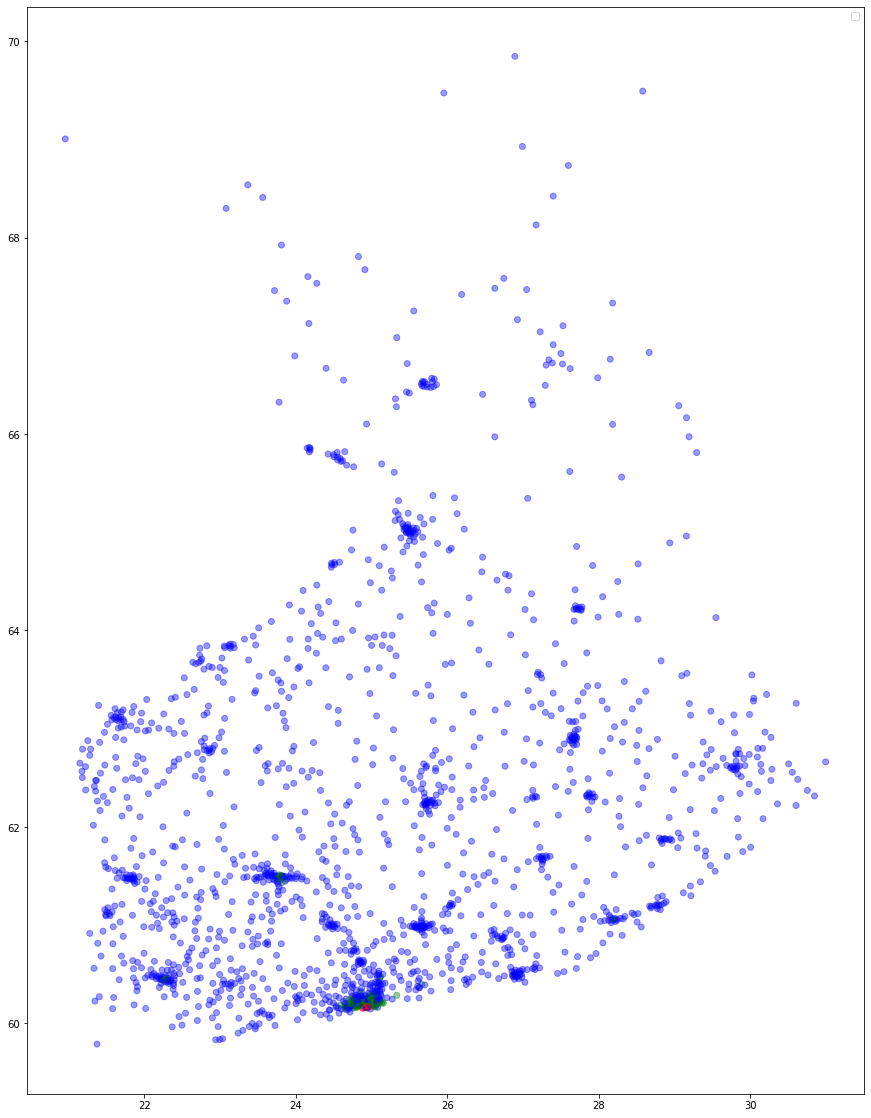

In [36]:
# plot
colours = {0: "blue", 1: "red", 2: "green"}

plt.figure(figsize=(15, 20))
plt.scatter(x=ts_df["longitude"], y=ts_df["latitude"], alpha=0.4,
            c=ts_df["label"].map(colours))
plt.legend()

# Time Series K Means

In [43]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

ts_df = pd.DataFrame()
grouping = three_room.groupby('PC')
for i in df.PC.unique():
    ts_df[str(i)] = grouping.get_group(i)["EUR/m2"].values
ts_df = ts_df.T
ts_df
print('generated ts_df')

K = range(2, 6)
silhouette_scores = []

for k in K:
    print('k: ', k)
    km = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=-1)
    labels = km.fit_predict(ts_df)
    score = silhouette_score(ts_df, labels, metric="dtw")
    print('Silhouette score:', score)
    silhouette_scores.append(score)


generated ts_df
k:  2
Silhouette score: 0.9045738600880513
k:  3
Silhouette score: 0.8572011137466446
k:  4
Silhouette score: 0.8610442857870569
k:  5
Silhouette score: 0.8474364064811241


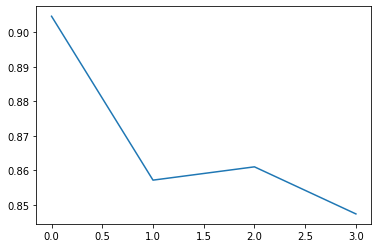

In [44]:
plt.plot(silhouette_scores)
